In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo Excel
file_path = '/content/Simulacion Armonicos (2).xlsx'
data = pd.read_excel(file_path)

# Verificar las primeras filas para entender la estructura
print(data.head(10))


  Unnamed: 0  Unnamed: 1  Unnamed: 2                       Unnamed: 3  \
0        NaN         NaN         NaN                              NaN   
1        NaN         NaN         NaN                              NaN   
2       Vrms       Vpico  Vpatenuada  Relacion de atenuacion de señal   
3        110  155.563492         2.5                        62.225397   
4        NaN         NaN         NaN                              NaN   
5        NaN         NaN         NaN                              NaN   
6        NaN         NaN         NaN                              NaN   
7        NaN         NaN         NaN                              NaN   
8        NaN         NaN         NaN                              NaN   
9        NaN         NaN         NaN                              NaN   

   Unnamed: 4 Unnamed: 5 Unnamed: 6  Unnamed: 7 Unnamed: 8  \
0         NaN        NaN        NaN         NaN        NaN   
1         NaN        NaN        NaN         NaN        NaN   
2         

In [ ]:
# Revisar los nombres de las columnas
print(data.columns)


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Frecuencia de muestreo', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Muestreo', 'N', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')


In [ ]:
# Extraer los datos desde la fila 5 hasta la fila 1028 (0-indexed, fila 4 a fila 1027 en pandas)
time = data.iloc[5:1028, 10].astype(float).values  # Columna K (muestreo)
V_t = data.iloc[5:1028, 11].astype(float).values   # Columna L
V_atenuada = data.iloc[5:1028, 12].astype(float).values  # Columna M
V_offset = data.iloc[5:1028, 13].astype(float).values    # Columna N



In [ ]:
# Número de puntos de datos
N = len(time)
# Intervalo de muestreo (asumiendo que los tiempos están igualmente espaciados)
T = time[1] - time[0]

# FFT para cada señal
fft_V_t = fft(V_t)
fft_V_atenuada = fft(V_atenuada)
fft_V_offset = fft(V_offset)

# Frecuencias correspondientes
freq = fftfreq(N, T)


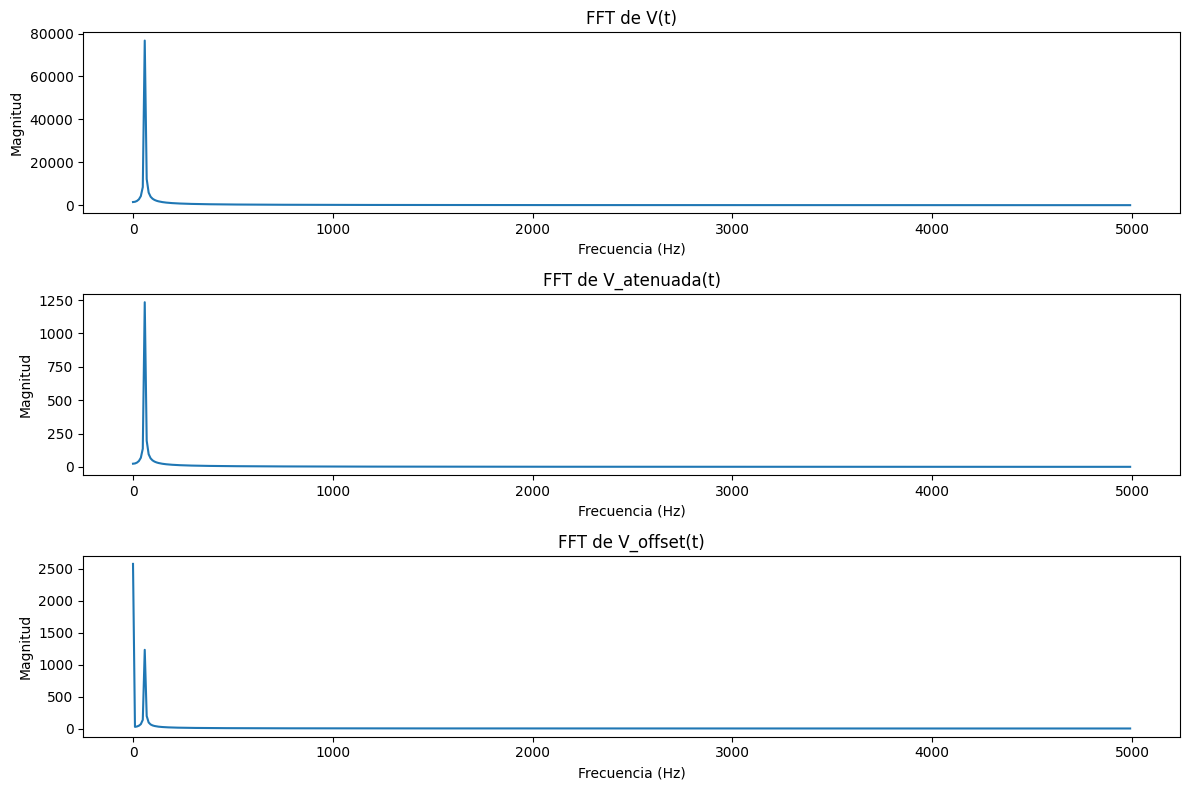

In [ ]:
plt.figure(figsize=(12, 8))

# FFT de V(t)
plt.subplot(3, 1, 1)
plt.plot(freq[:N//2], np.abs(fft_V_t[:N//2]))
plt.title('FFT de V(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

# FFT de V_atenuada(t)
plt.subplot(3, 1, 2)
plt.plot(freq[:N//2], np.abs(fft_V_atenuada[:N//2]))
plt.title('FFT de V_atenuada(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

# FFT de V_offset(t)
plt.subplot(3, 1, 3)
plt.plot(freq[:N//2], np.abs(fft_V_offset[:N//2]))
plt.title('FFT de V_offset(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()


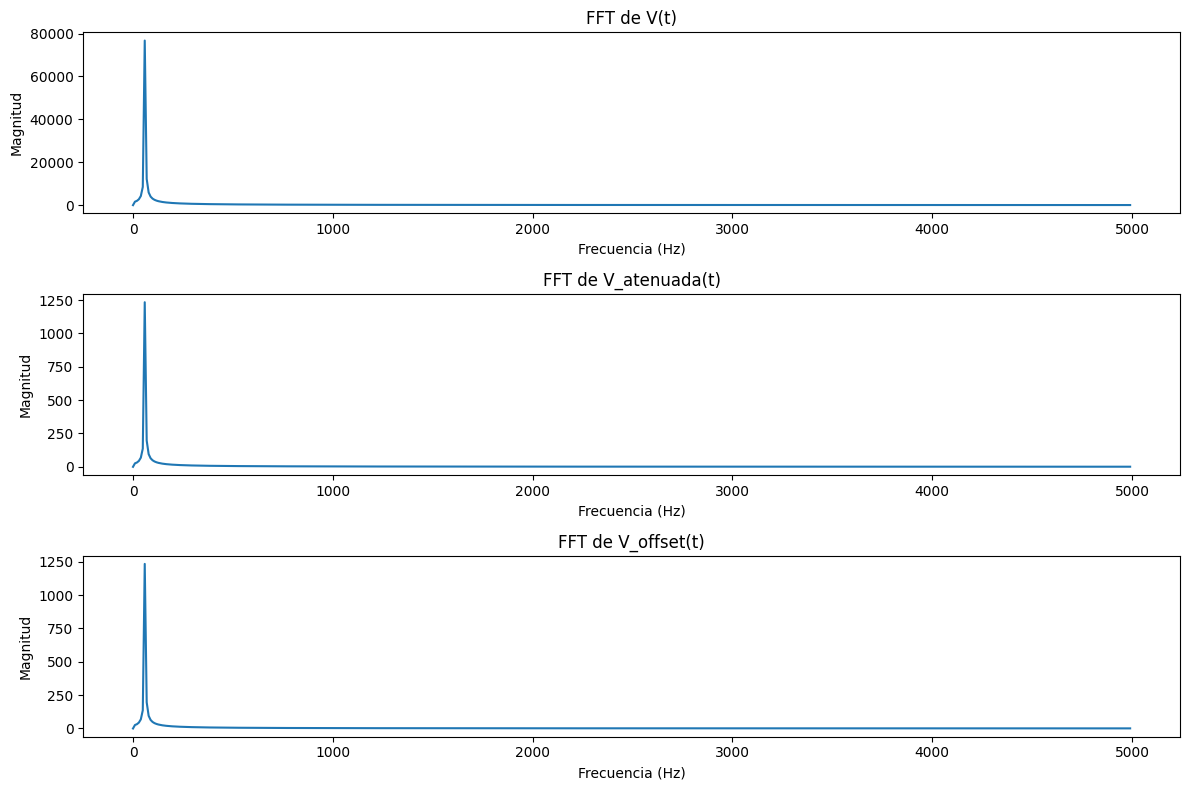

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo Excel
file_path = '/content/Simulacion Armonicos (2).xlsx'
data = pd.read_excel(file_path)

# Extraer los datos desde la fila 5 hasta la fila 1028 (0-indexed, fila 4 a fila 1027 en pandas)
time = data.iloc[5:1028, 10].astype(float).values  # Columna K (muestreo)
V_t = data.iloc[5:1028, 11].astype(float).values   # Columna L
V_atenuada = data.iloc[5:1028, 12].astype(float).values  # Columna M
V_offset = data.iloc[5:1028, 13].astype(float).values    # Columna N

# Eliminar la componente de continua restando la media
V_t -= np.mean(V_t)
V_atenuada -= np.mean(V_atenuada)
V_offset -= np.mean(V_offset)

# Número de puntos de datos
N = len(time)
# Intervalo de muestreo (asumiendo que los tiempos están igualmente espaciados)
T = time[1] - time[0]

# FFT para cada señal
fft_V_t = fft(V_t)
fft_V_atenuada = fft(V_atenuada)
fft_V_offset = fft(V_offset)

# Frecuencias correspondientes
freq = fftfreq(N, T)

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# FFT de V(t)
plt.subplot(3, 1, 1)
plt.plot(freq[:N//2], np.abs(fft_V_t[:N//2]))
plt.title('FFT de V(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

# FFT de V_atenuada(t)
plt.subplot(3, 1, 2)
plt.plot(freq[:N//2], np.abs(fft_V_atenuada[:N//2]))
plt.title('FFT de V_atenuada(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

# FFT de V_offset(t)
plt.subplot(3, 1, 3)
plt.plot(freq[:N//2], np.abs(fft_V_offset[:N//2]))
plt.title('FFT de V_offset(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()


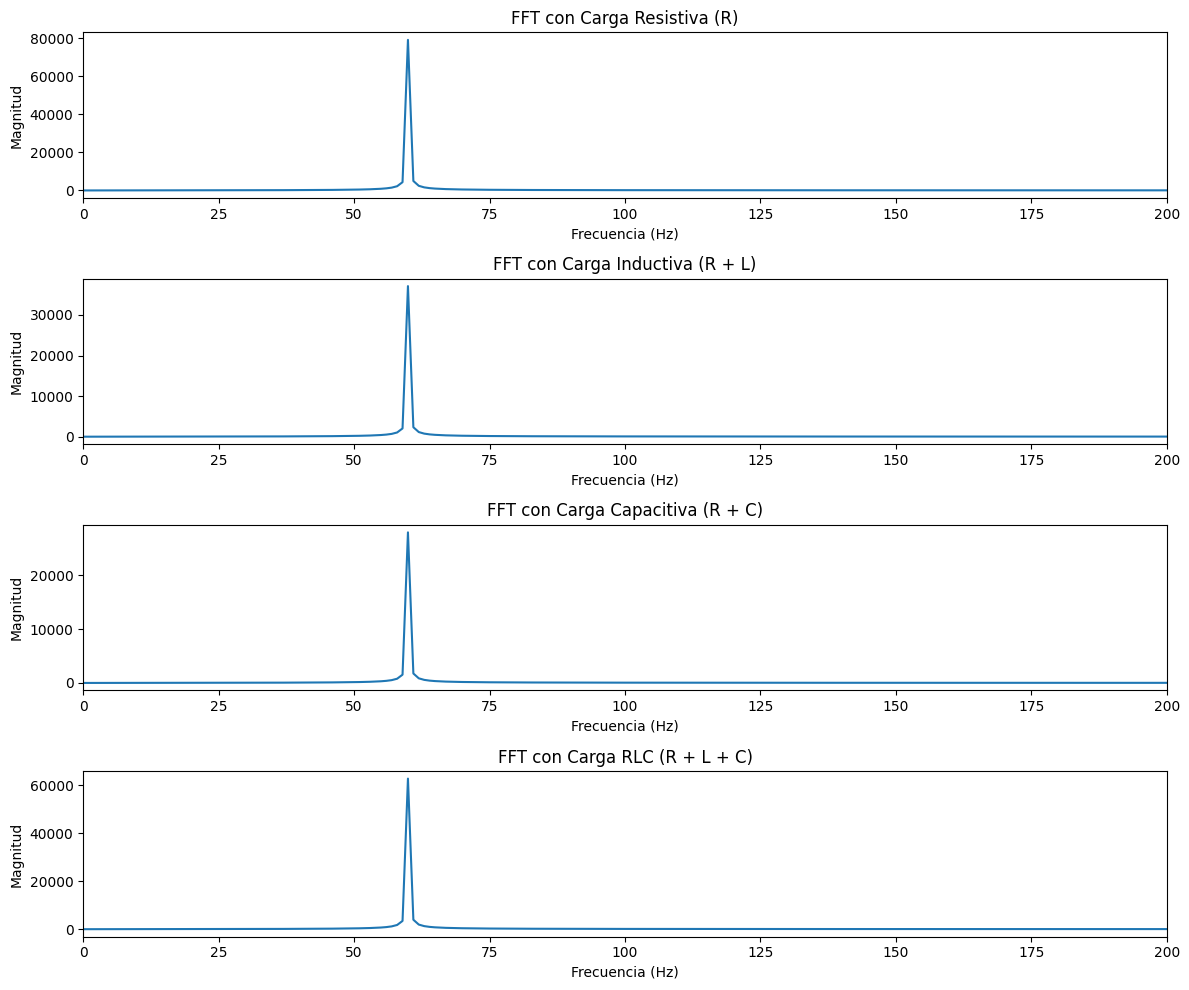

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la señal
f = 60  # Frecuencia de la red eléctrica
T = 1 / f  # Periodo
t = np.linspace(0, 1, 1024)  # Vector de tiempo

# Señal original
V = 110 * np.sqrt(2) * np.sin(2 * np.pi * f * t)  # Señal de 110V RMS a 60Hz

# Simulación de diferentes cargas
def simulate_load(V, R=0, L=0, C=0):
    omega = 2 * np.pi * f

    # Calcular la impedancia total Z
    if L == 0 and C == 0:
        Z = R
    elif L == 0:
        Z = R - 1j / (omega * C)
    elif C == 0:
        Z = R + 1j * omega * L
    else:
        Z = R + 1j * (omega * L - 1 / (omega * C))

    I = V / Z  # Corriente a través de la carga
    V_load = I * Z.real  # Caída de tensión en la resistencia (para simplificar)
    return V_load

# Diferentes cargas
R = 10  # Resistencia en ohmios
L = 0.05  # Inductancia en henrios
C = 0.0001  # Capacitancia en faradios

# Señal con carga
V_R = simulate_load(V, R=R)
V_RL = simulate_load(V, R=R, L=L)
V_RC = simulate_load(V, R=R, C=C)
V_RLC = simulate_load(V, R=R, L=L, C=C)

# FFT de las señales
def plot_fft(V, title):
    N = len(V)
    T = t[1] - t[0]
    fft_V = fft(V)
    freq = fftfreq(N, T)
    plt.plot(freq[:N//2], np.abs(fft_V[:N//2]))
    plt.title(title)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.xlim(0, 200)  # Ajustar límite del eje X para ver más detalles cerca de 60 Hz

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plot_fft(V_R, 'FFT con Carga Resistiva (R)')

plt.subplot(4, 1, 2)
plot_fft(V_RL, 'FFT con Carga Inductiva (R + L)')

plt.subplot(4, 1, 3)
plot_fft(V_RC, 'FFT con Carga Capacitiva (R + C)')

plt.subplot(4, 1, 4)
plot_fft(V_RLC, 'FFT con Carga RLC (R + L + C)')

plt.tight_layout()
plt.show()
